In [1]:
import numpy as np
import emcee

def lnprob(x, ivar):
    return -0.5 * np.sum(ivar * x ** 2)

ndim, nwalkers = 10, 100
ivar = 1. / np.random.rand(ndim)
p0 = [np.random.rand(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[ivar])
sampler.run_mcmc(p0, 1000)

(array([[-3.38427564e-01, -4.58733900e-01, -2.07463518e-01,
         -9.42943989e-01, -4.37388219e-02, -4.91792645e-01,
          2.52488440e-02, -8.90423398e-03, -1.08086882e+00,
          3.93424494e-01],
        [ 9.82440170e-01,  5.48690310e-01,  1.30302096e+00,
          8.51692971e-01,  5.14500657e-01,  3.63152625e-01,
         -1.15639826e-01, -1.78914109e-02,  5.46940733e-01,
         -1.65552089e-01],
        [ 6.34678104e-01,  1.18447357e-01, -1.69905622e+00,
          8.24502068e-02,  5.52260860e-01, -1.35328332e+00,
          6.60924048e-03, -2.31041259e-02, -2.38328835e-01,
         -3.65768668e-01],
        [-1.41980867e+00,  1.48527288e-01,  1.54351140e+00,
         -2.24212311e-01, -1.72334767e-02, -1.66210610e+00,
          2.24399591e-02,  2.24344397e-03, -4.21916934e-01,
         -1.55962648e-01],
        [-4.81437188e-01,  1.67680293e-01,  1.05292966e+00,
         -7.15172125e-01,  4.52636170e-01,  4.92301500e-01,
         -1.00141439e-01,  3.64762399e-02, -1.229874

In [2]:
import numpy as np
import emcee

In [3]:
def lnprob(x, mu, icov):
    diff = x-mu
    return -np.dot(diff,np.dot(icov,diff))/2.0



In [4]:
ndim = 50


means = np.random.rand(ndim)

cov = 0.5 - np.random.rand(ndim ** 2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov,cov)

icov = np.linalg.inv(cov)

In [5]:
nwalkers = 250
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

In [6]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[means, icov])

In [8]:
pos, prob, state = sampler.run_mcmc(p0, 100)
sampler.reset()

In [9]:
sampler.run_mcmc(pos, 1000)

(array([[ 2.65480104,  0.64045352,  0.28542573, ..., -1.6732476 ,
         -2.30316702, -0.42589718],
        [-0.03094182, -1.72212864, -0.42419347, ..., -0.70891384,
          1.88247349, -1.16680478],
        [-1.03718552, -0.77343523,  0.11128356, ...,  2.69199016,
         -0.04563347,  2.17622613],
        ...,
        [ 3.12653651,  3.17445576,  0.39730495, ..., -0.74588097,
         -2.49394971, -3.1160961 ],
        [-3.53336831,  4.62157533,  0.70427724, ...,  0.64316378,
          0.19146938,  1.8370993 ],
        [ 0.21497394,  2.91359703, -4.37822653, ...,  0.51167379,
          1.16343414,  1.07339109]]),
 array([-18.12874488, -40.05991841, -26.66004574, -24.64537594,
        -16.79612982, -17.3875864 , -21.92496294, -27.10220039,
        -24.34753579, -25.66283869, -25.65049229, -20.54258876,
        -21.99871058, -24.11726963, -28.43217696, -27.16247626,
        -26.81628874, -25.00196779, -31.50501558, -19.92862444,
        -19.92999411, -26.404047  , -23.53552848, -29

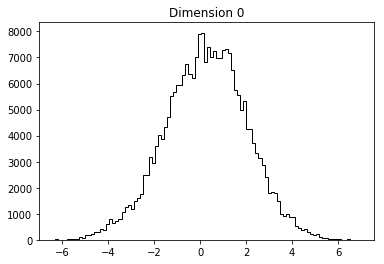

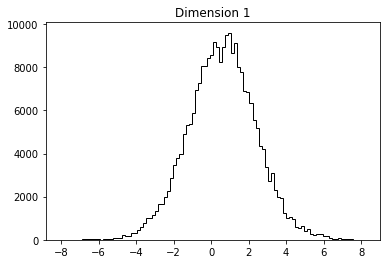

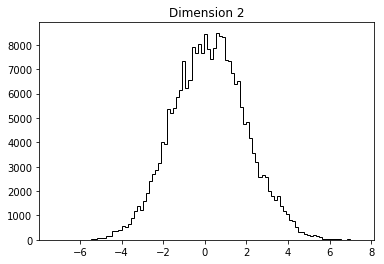

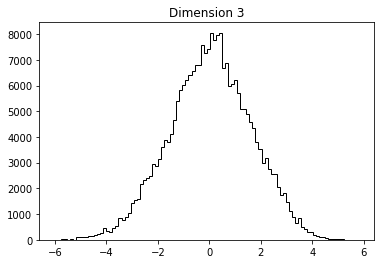

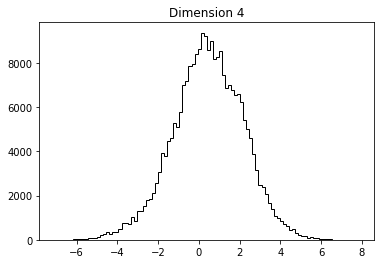

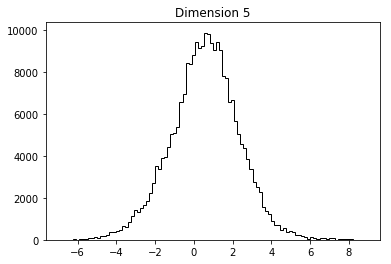

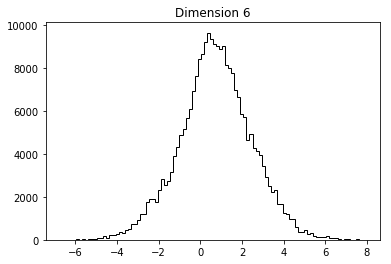

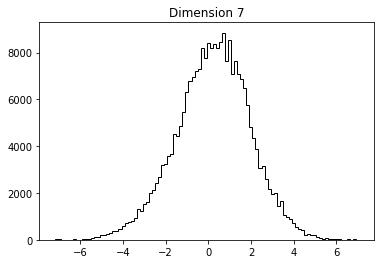

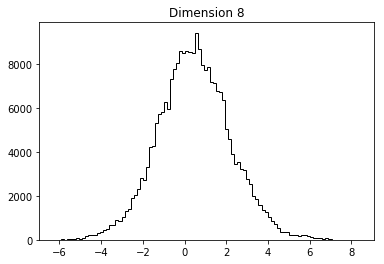

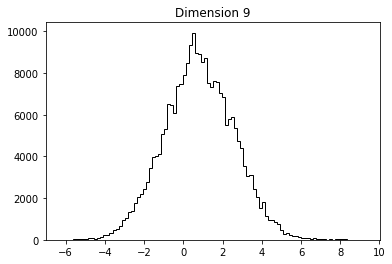

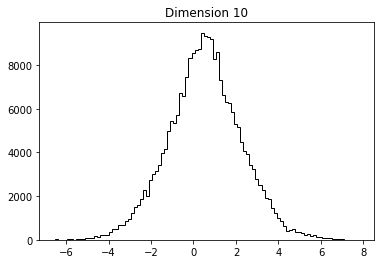

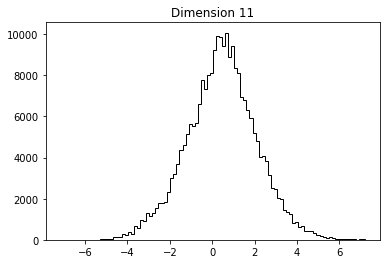

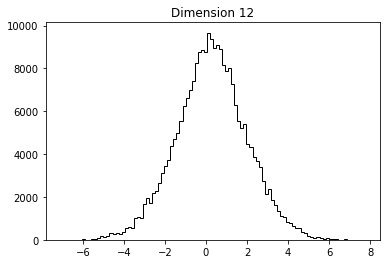

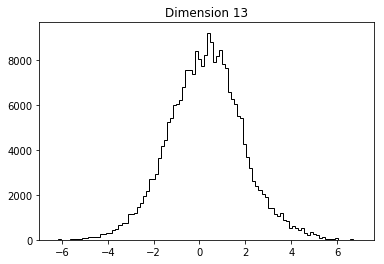

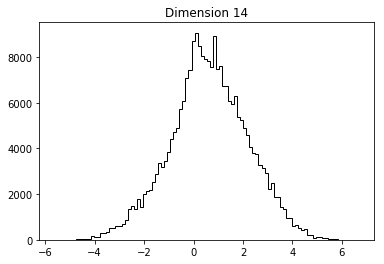

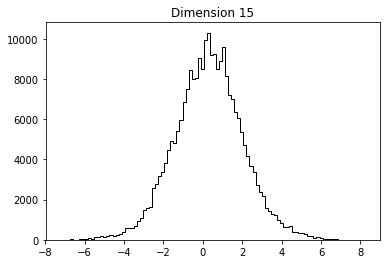

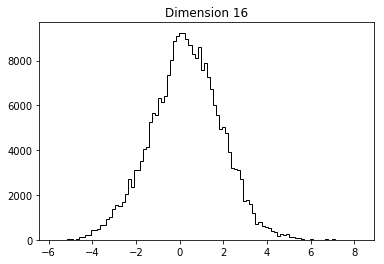

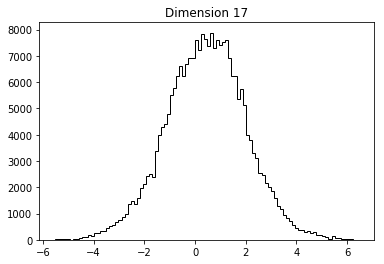

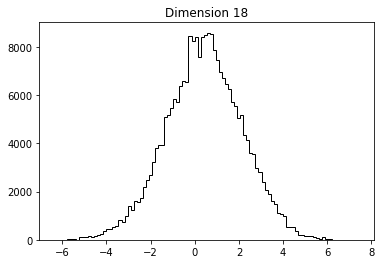

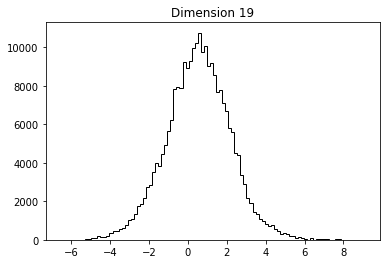

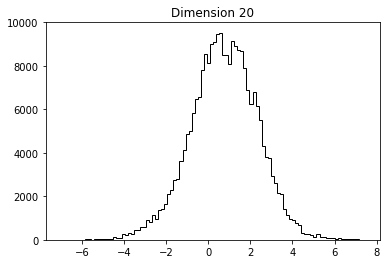

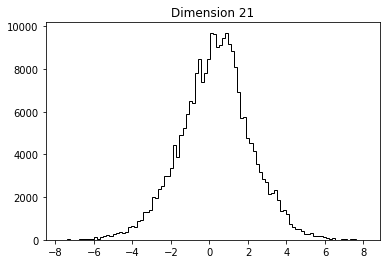

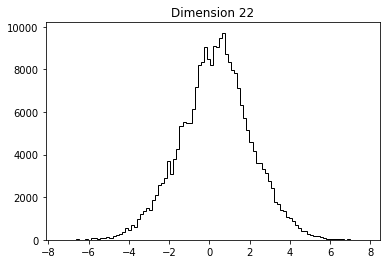

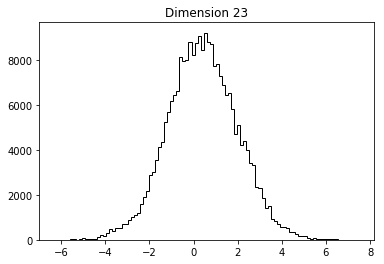

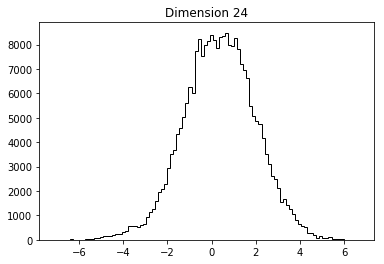

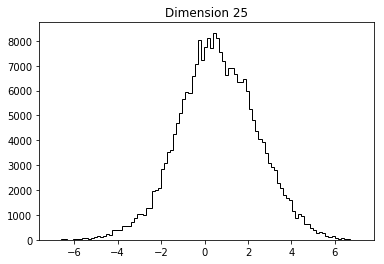

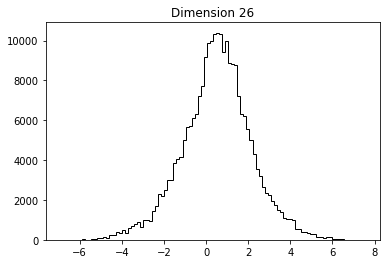

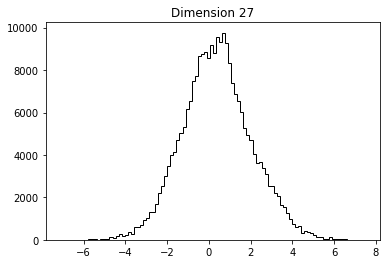

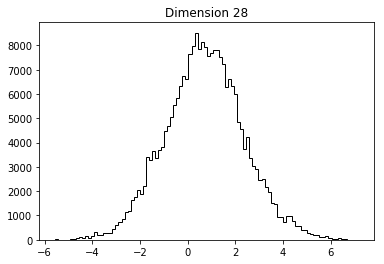

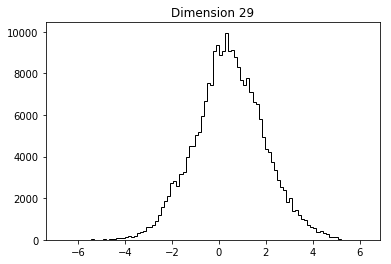

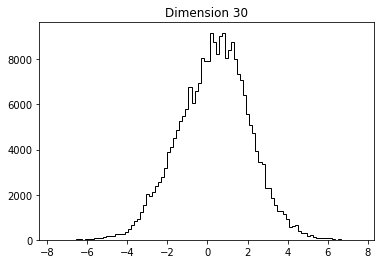

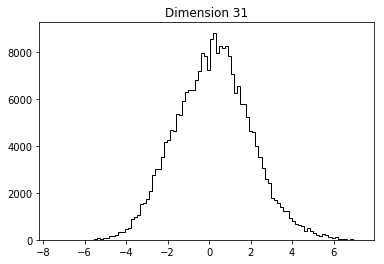

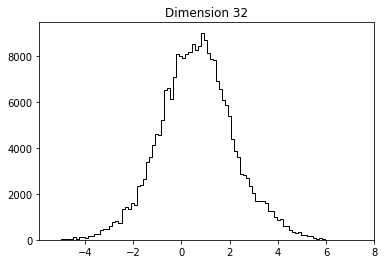

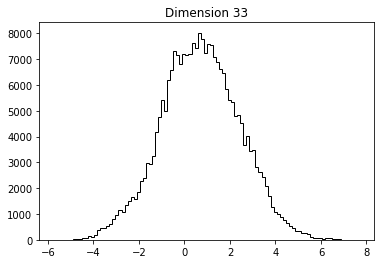

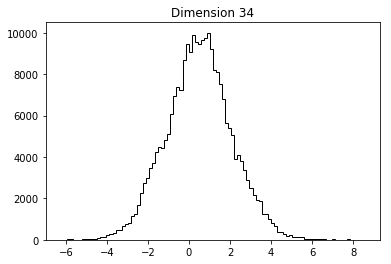

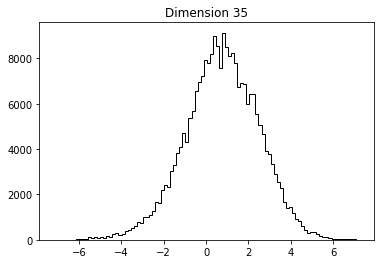

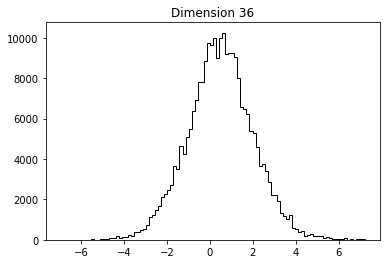

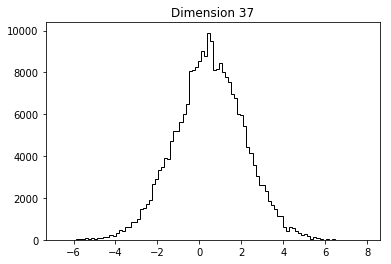

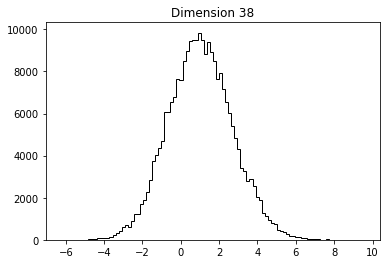

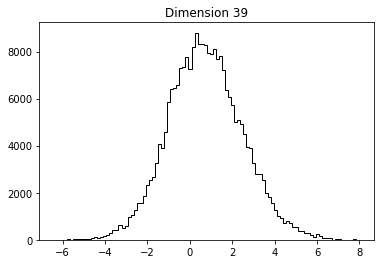

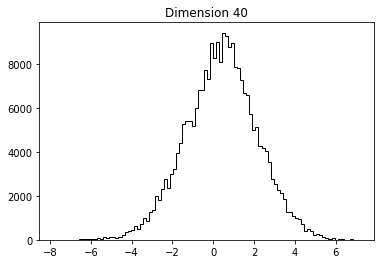

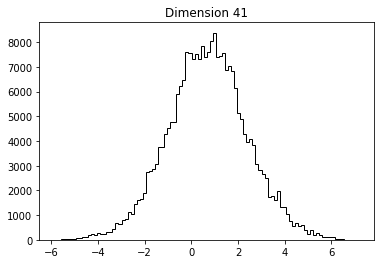

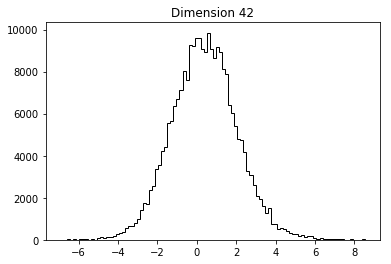

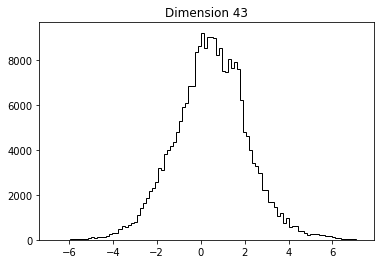

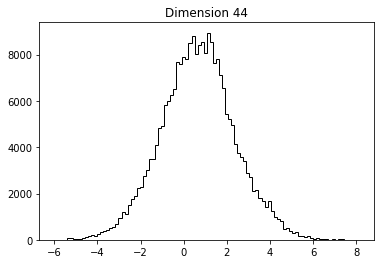

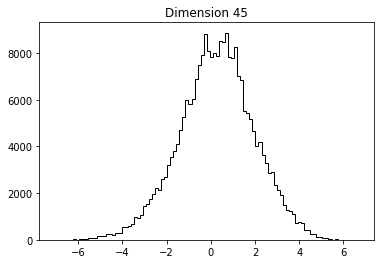

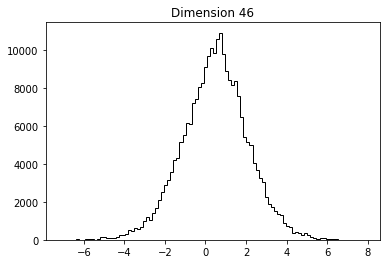

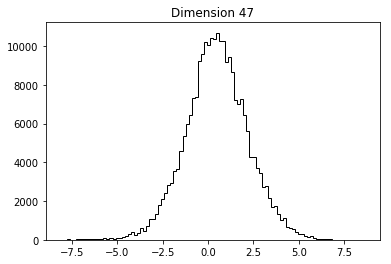

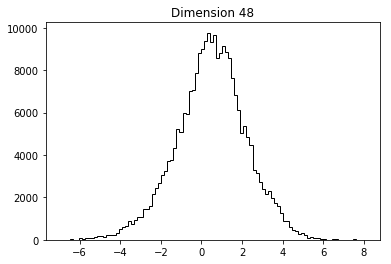

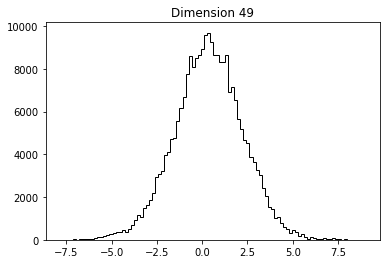

In [18]:
import matplotlib.pyplot as pl
pl.rcParams.update({'figure.max_open_warning': 0})            

for i in range(ndim):
    pl.figure()
    pl.hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
    pl.title("Dimension {0:d}".format(i))

pl.show()

In [19]:
print("Mean acceptance fraction: {0:.3f}"
                .format(np.mean(sampler.acceptance_fraction)))

Mean acceptance fraction: 0.190


In [20]:
import numpy as np

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)


In [25]:
A = np.vstack((np.ones_like(x), x)).T
C = np.diag(yerr * yerr)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))
